<a href="https://colab.research.google.com/github/smybilginn/digital_image_processing/blob/main/2_geometric_transformations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io


In [ ]:
# Görüntüyü internetten okuyalım
img_url = 'https://static.wikia.nocookie.net/computervision/images/3/34/Lenna.jpg/revision/latest?cb=20050408081934'
img = io.imread(img_url)


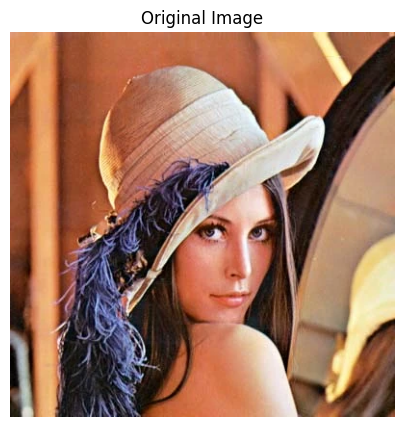

In [ ]:
plt.figure(figsize=(5,5))
plt.imshow(img)
plt.axis('off')
plt.title('Original Image')
plt.show()


In [ ]:
print(img.shape)

(400, 400, 3)


 Görüntüyü Yükleme ve Gösterme

- Görüntüyü URL üzerinden okuduk
- Görüntü boyutu: `(400, 400, 3)` → 3 renk kanalı (RGB)
- RGB kanalları:
  - 0 → kırmızı
  - 1 → yeşil
  - 2 → mavi

**Neden önemli?**
- Rotation, scaling, shear gibi dönüşümlerde koordinatlar ve kanal bilgisi lazım
- Interpolation her renk kanalı için ayrı uygulanır

---


##Adım 1 — Resize (Nearest, Bilinear, Bicubic)

1. İlk olarak boyutu ayarlayacağız

In [ ]:
scale = 0.5
new_rows = int(img.shape[0] * scale)
new_cols = int(img.shape[1] * scale)


2. Nearest Neighebor, Bilinear ve Bicubic uygulayacağız

In [ ]:
from skimage import transform

# Nearest Neighbor
img_nearest = transform.resize(img,
                               (new_rows, new_cols),
                               order=0,      # Nearest
                               preserve_range=True)

# Bilinear
img_bilinear = transform.resize(img,
                                (new_rows, new_cols),
                                order=1,      # Bilinear
                                preserve_range=True)

# Bicubic
img_bicubic = transform.resize(img,
                               (new_rows, new_cols),
                               order=3,      # Bicubic
                               preserve_range=True)


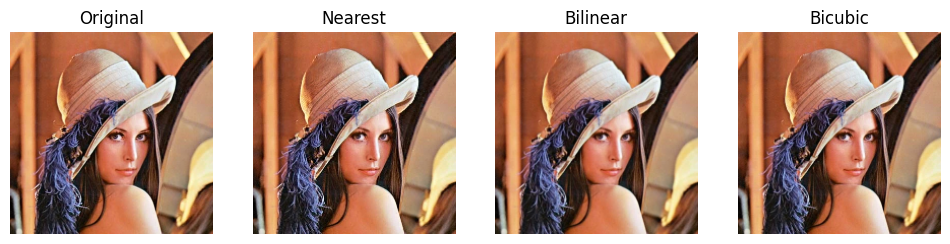

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,4,1)
plt.imshow(img.astype(np.uint8))
plt.title('Original')
plt.axis('off')

plt.subplot(1,4,2)
plt.imshow(img_nearest.astype(np.uint8))
plt.title('Nearest')
plt.axis('off')

plt.subplot(1,4,3)
plt.imshow(img_bilinear.astype(np.uint8))
plt.title('Bilinear')
plt.axis('off')

plt.subplot(1,4,4)
plt.imshow(img_bicubic.astype(np.uint8))
plt.title('Bicubic')
plt.axis('off')

plt.show()



## Resize ve Interpolation

### Amaç
- Görüntüyü yarıya küçültmek
- Farklı interpolation yöntemlerinin farkını gözlemlemek

### Interpolation Yöntemleri

| Yöntem | Komşu Piksel Sayısı | Özellik |
|--------|-------------------|---------|
| Nearest Neighbor | 1 | Hızlı, bloklu pikselleşmiş görüntü |
| Bilinear | 4 | 4 komşu pikselin ağırlıklı ortalaması, daha yumuşak |
| Bicubic | 16 | 4x4 komşuluk, kenarlarda en düzgün sonuç |

### Sonuçlar
- Nearest → bloklu, pikselleşmiş
- Bilinear → orta kalite, yumuşak
- Bicubic → en pürüzsüz ve doğal


##ADIM 2: Rotation(Döndürme)

Amacımız:

Görüntüyü belirli bir açıyla döndürmek

Farklı interpolation yöntemlerini gözlemlemek

In [ ]:
from skimage import transform

angle = 30  # derece


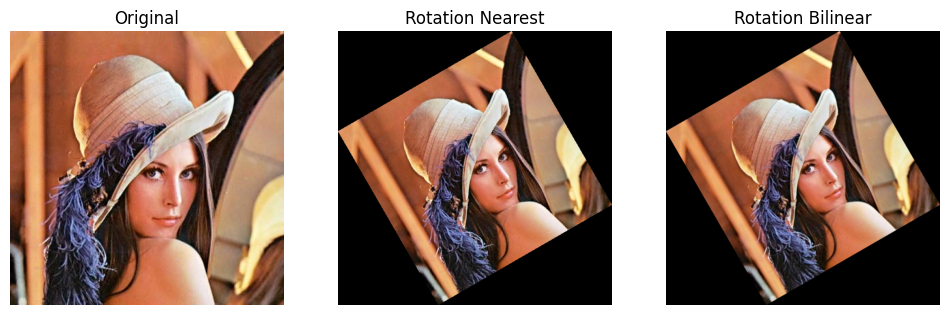

In [ ]:
# Nearest Neighbor Rotation
rot_nearest = transform.rotate(img, angle, resize=True, order=0, preserve_range=True)

# Bilinear Rotation
rot_bilinear = transform.rotate(img, angle, resize=True, order=1, preserve_range=True)

# Görselleştirme
plt.figure(figsize=(12,5))

plt.subplot(1,3,1)
plt.imshow(img.astype(np.uint8))
plt.title('Original')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(rot_nearest.astype(np.uint8))
plt.title('Rotation Nearest')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(rot_bilinear.astype(np.uint8))
plt.title('Rotation Bilinear')
plt.axis('off')

plt.show()


##Adım 4 — Translation (Kaydırma) ve Shear

Translation: Görüntüyü X ve Y yönünde kaydıracağız

Shear: Görüntüyü yatay veya dikey olarak eğeceğiz

In [ ]:
from skimage import transform

# Translation parametreleri
tx = 50  # x yönünde
ty = -30 # y yönünde

tform_translate = transform.AffineTransform(translation=(tx, ty))


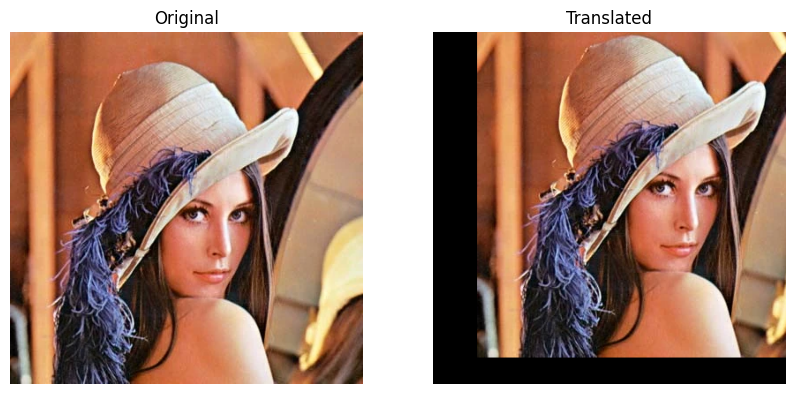

In [ ]:
# Translation uygulanıyor
translated = transform.warp(img, tform_translate.inverse, preserve_range=True)

# Görselleştirme
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(img.astype(np.uint8))
plt.title('Original')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(translated.astype(np.uint8))
plt.title('Translated')
plt.axis('off')

plt.show()


##Adım 5 — Shear (Eğme / Yatay veya Dikey Kaydırma)

Shear ile görüntüyü yatay veya dikey olarak eğeceğiz

Rotation + Translation’dan farkı: kenarları eğiyor, dik açıları bozuyor

In [ ]:
# Shear parametreleri
shear_x = 0.3  # yatay eğme
shear_y = 0.0  # dikey eğme

tform_shear = transform.AffineTransform(shear=shear_x)


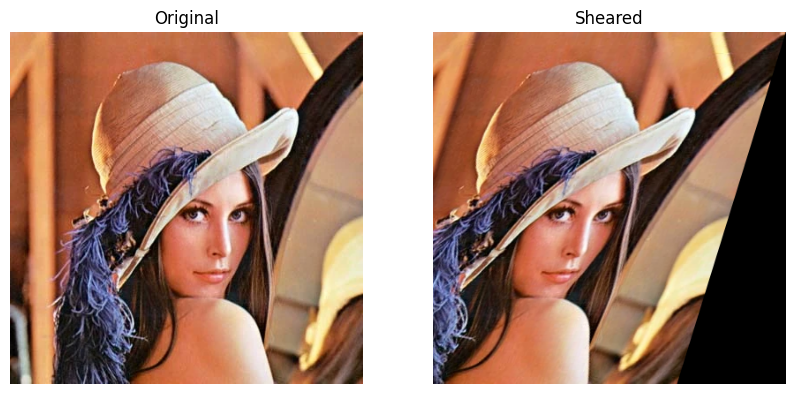

In [ ]:
# Shear uygulanıyor
sheared = transform.warp(img, tform_shear.inverse, preserve_range=True)

# Görselleştirme
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(img.astype(np.uint8))
plt.title('Original')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(sheared.astype(np.uint8))
plt.title('Sheared')
plt.axis('off')

plt.show()


yatay

In [ ]:
shear_y = 0.3
tform_shear_vertical = transform.AffineTransform(matrix=[[1, 0, 0],
                                                          [shear_y, 1, 0],
                                                          [0, 0, 1]])


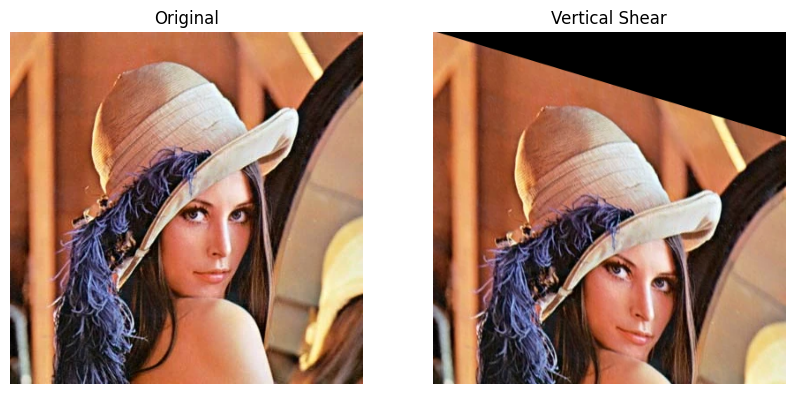

In [ ]:
sheared_vertical = transform.warp(img, tform_shear_vertical.inverse, preserve_range=True)

# Görselleştirme
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(img.astype(np.uint8))
plt.title('Original')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(sheared_vertical.astype(np.uint8))
plt.title('Vertical Shear')
plt.axis('off')

plt.show()

dikey